Experiment 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Generate random data similar to MNIST
x_train = np.random.rand(60000, 28, 28, 1).astype('float32')
x_test = np.random.rand(10000, 28, 28, 1).astype('float32')
y_train = np.random.randint(10, size=(60000,))
y_test = np.random.randint(10, size=(10000,))

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=200,
validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.0979 - loss: 2.3184 - val_accuracy: 0.0968 - val_loss: 2.3026
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - accuracy: 0.1027 - loss: 2.3026 - val_accuracy: 0.1024 - val_loss: 2.3027
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.1024 - loss: 2.3026 - val_accuracy: 0.0968 - val_loss: 2.3028
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.1017 - loss: 2.3026 - val_accuracy: 0.0968 - val_loss: 2.3028
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - accuracy: 0.0995 - loss: 2.3025 - val_accuracy: 0.0968 - val_loss: 2.3028
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.1016 - loss: 2.3026 - val_accuracy: 0.0968 - val_loss: 2.3028
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.1004 - loss: 2.3026 - val_accuracy: 0.1013 - val_loss: 2.3033
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.1026 - loss: 2.3023 - 

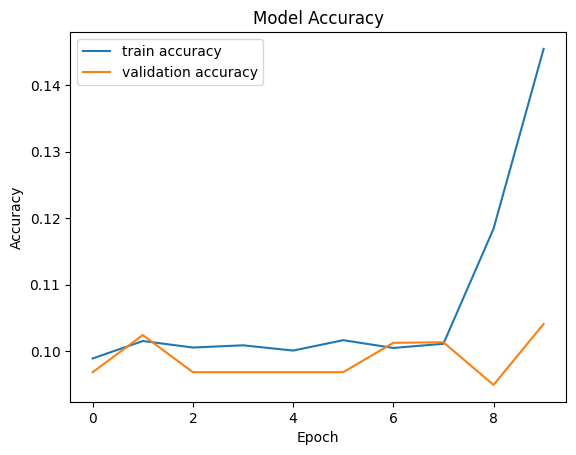

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing.sequence import pad_sequences


In [ ]:
# Load IMDB dataset with top 10,000 words only
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
# Pad sequences to ensure uniform input size
max_length = 500
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 344s 1s/step - accuracy: 0.6821 - loss: 0.5580 - val_accuracy: 0.8174 - val_loss: 0.4026
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - accuracy: 0.8903 - loss: 0.2810 - val_accuracy: 0.7940 - val_loss: 0.4480
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - accuracy: 0.8691 - loss: 0.3153 - val_accuracy: 0.8648 - val_loss: 0.3631
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.9172 - loss: 0.2111 - val_accuracy: 0.8382 - val_loss: 0.3705
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.9366 - loss: 0.1720 - val_accuracy: 0.8746 - val_loss: 0.3693


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


**AML LAB 3**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model


In [ ]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Resize images to match VGG16 input size (224x224)
x_train = tf.image.resize(x_train, (224, 224))
x_test = tf.image.resize(x_test, (224, 224))

# Convert to 3 channels by repeating across the last dimension
x_train = tf.image.grayscale_to_rgb(x_train)
x_test = tf.image.grayscale_to_rgb(x_test)

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Load VGG16 without the top (classification) layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# Define the new model
model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.3534 - loss: 1.7523 - val_accuracy: 0.5389 - val_loss: 1.2871
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 45ms/step - accuracy: 0.5730 - loss: 1.2031 - val_accuracy: 0.5816 - val_loss: 1.1879
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.6407 - loss: 1.0252 - val_accuracy: 0.6662 - val_loss: 0.9634
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.6799 - loss: 0.9062 - val_accuracy: 0.6708 - val_loss: 0.9372
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.7092 - loss: 0.8255 - val_accuracy: 0.6808 - val_loss: 0.9147
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7355 - loss: 0.7686 - val_accuracy: 0.6827 - val_loss: 0.9190
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.7458 - loss: 0.7221 - val_accuracy: 0.7031 - val_loss: 0.8760
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7664 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 5s - 15ms/step - accuracy: 0.7181 - loss: 0.8689
Test accuracy: 0.7181000113487244


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # Adjust output classes as needed

model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Assume `train_generator` and `validation_generator` are defined
model.fit(train_generator, validation_data=validation_generator, epochs=10)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_generator, validation_data=validation_generator, epochs=10)


**EXPERIMENT 4**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import cv2

In [ ]:
model = VGG16(weights="imagenet")
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def load_and_preprocess_image(img_path):
 img = cv2.imread(img_path)
 img = cv2.resize(img, (224, 224)) # VGG16 requires 224x224 input
 img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 img = preprocess_input(np.expand_dims(img, axis=0)) # Preprocess for VGG16
 return img

In [ ]:
def visualize_intermediate_activations(model, img_path, layer_names):
 img = load_and_preprocess_image(img_path)
 intermediate_models = [Model(inputs=model.input,
outputs=model.get_layer(name).output) for name in layer_names]

 for layer_name, intermediate_model in zip(layer_names, intermediate_models):
  intermediate_output = intermediate_model.predict(img)
  print(f"Visualizing layer: {layer_name}")
  num_filters = intermediate_output.shape[-1]
  size = intermediate_output.shape[1]

  plt.figure(figsize=(20, 20))
  for i in range(min(num_filters, 64)): # Visualize the first 64 filters
    plt.subplot(8, 8, i + 1)
    plt.imshow(intermediate_output[0, :, :, i], cmap="viridis")
    plt.axis("off")
  plt.suptitle(f"Intermediate Activations for {layer_name}")
  plt.show()

In [ ]:
def visualize_filters(model, layer_name):
 filters, biases = model.get_layer(name=layer_name).get_weights()
 n_filters = filters.shape[-1]
 plt.figure(figsize=(20, 20))
 for i in range(min(n_filters, 64)): # Visualize the first 64 filters
   f = filters[:, :, :, i]
   f_min, f_max = np.min(f), np.max(f)
   f = (f - f_min) / (f_max - f_min) # Normalize
   plt.subplot(8, 8, i + 1)
   plt.imshow(f[:, :, 0], cmap="viridis") # Assuming RGB (use f[:, :, :3] for color visualization)
   plt.axis("off")
 plt.suptitle(f"Filters of Layer {layer_name}")
 plt.show()


In [ ]:
def visualize_heatmap(model, img_path, last_conv_layer_name, class_idx=None):
    img = load_and_preprocess_image(img_path)
    last_conv_layer = model.get_layer(last_conv_layer_name)
    heatmap_model = Model(inputs=model.input, outputs=[last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = heatmap_model(img)
        if class_idx is None:
            class_idx = tf.argmax(predictions[0]) # Default to the predicted class
        class_channel = predictions[:, class_idx]

        # Calculate gradients and other operations within the 'with' block
        grads = tape.gradient(class_channel, conv_outputs)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        conv_outputs = conv_outputs[0]
        for i in range(conv_outputs.shape[-1]):
          conv_outputs[:, :, i] *= pooled_grads[i]
 # Generate heatmap
          heatmap = np.mean(conv_outputs, axis=-1)
          heatmap = np.maximum(heatmap, 0)
          heatmap /= np.max(heatmap) # Normalize to [0, 1]

          original_img = cv2.imread(img_path)
          original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
          original_img = cv2.resize(original_img, (224, 224))

          heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
          heatmap = np.uint8(255 * heatmap)
          heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

          superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

          plt.figure(figsize=(10, 10))
          plt.imshow(superimposed_img)
          plt.axis("off")
          plt.title("Class Activation Heatmap")
          plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Visualizing layer: block1_conv1


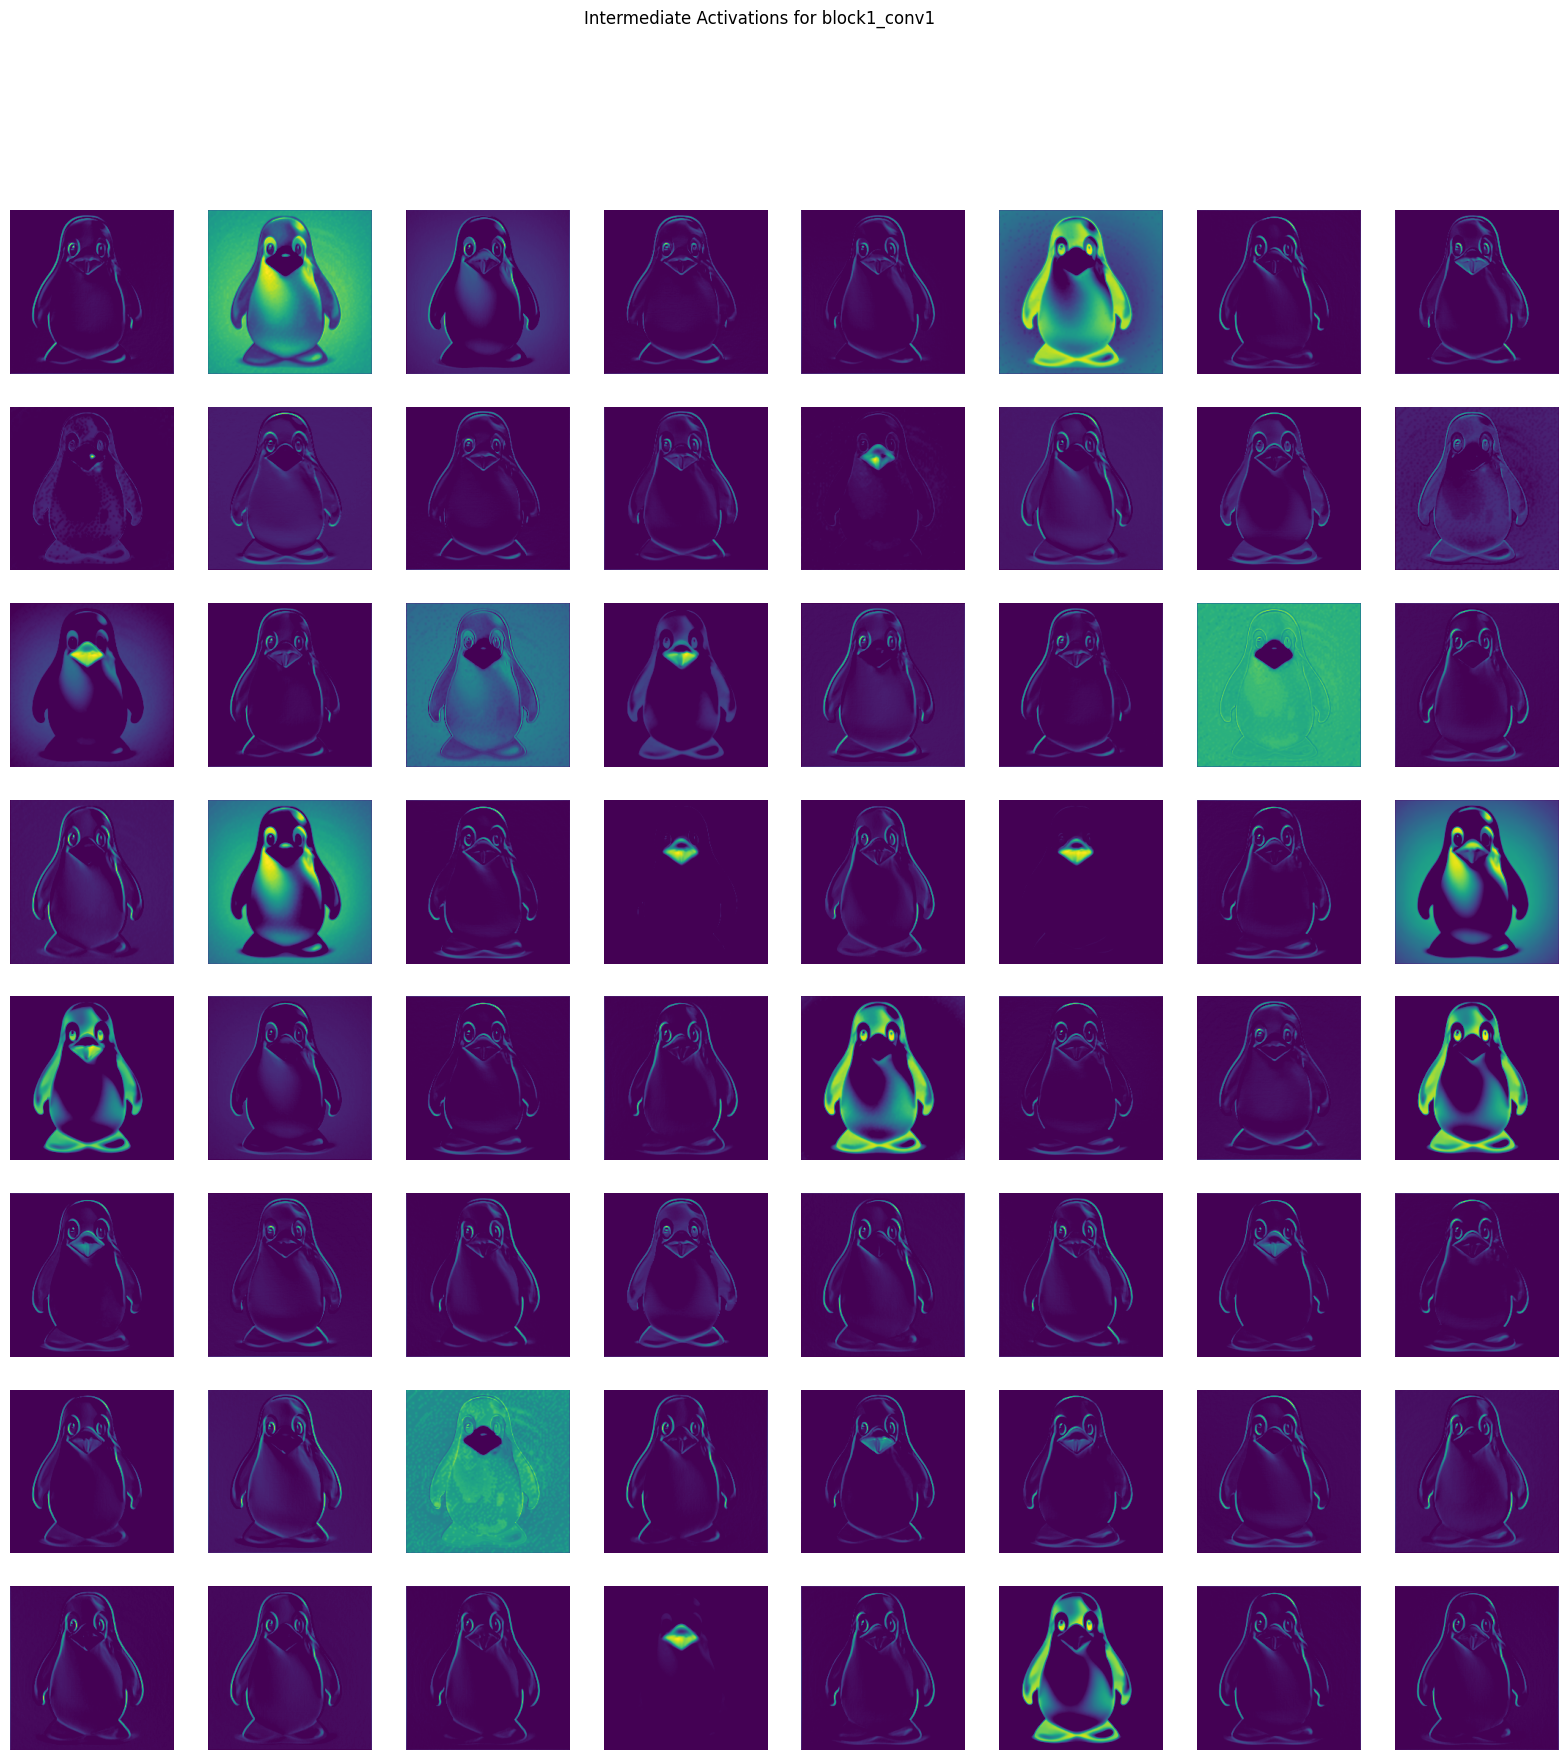

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Visualizing layer: block2_conv1


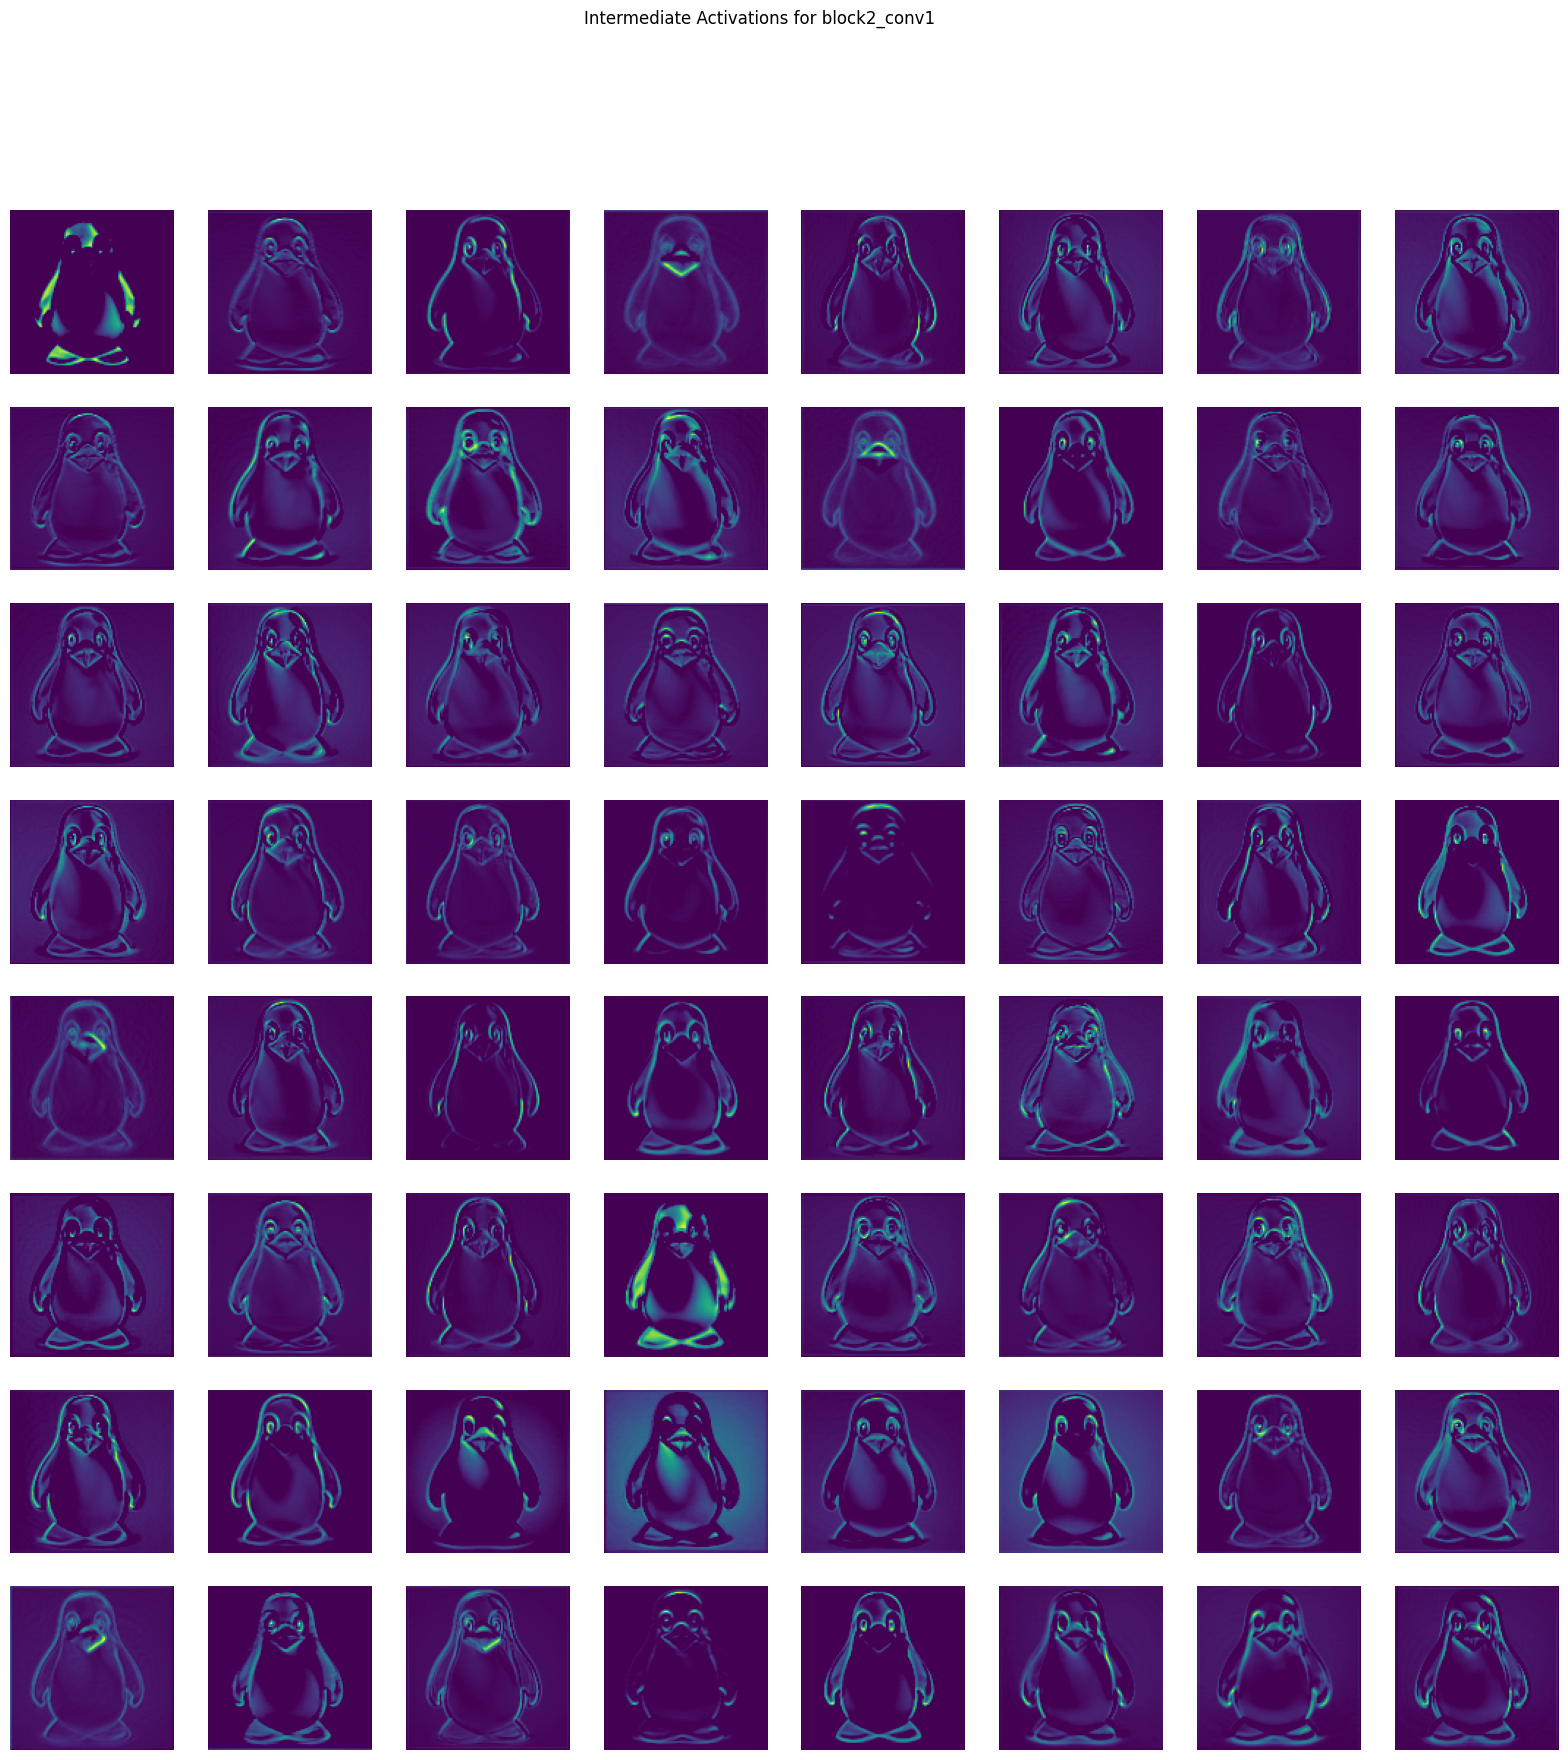

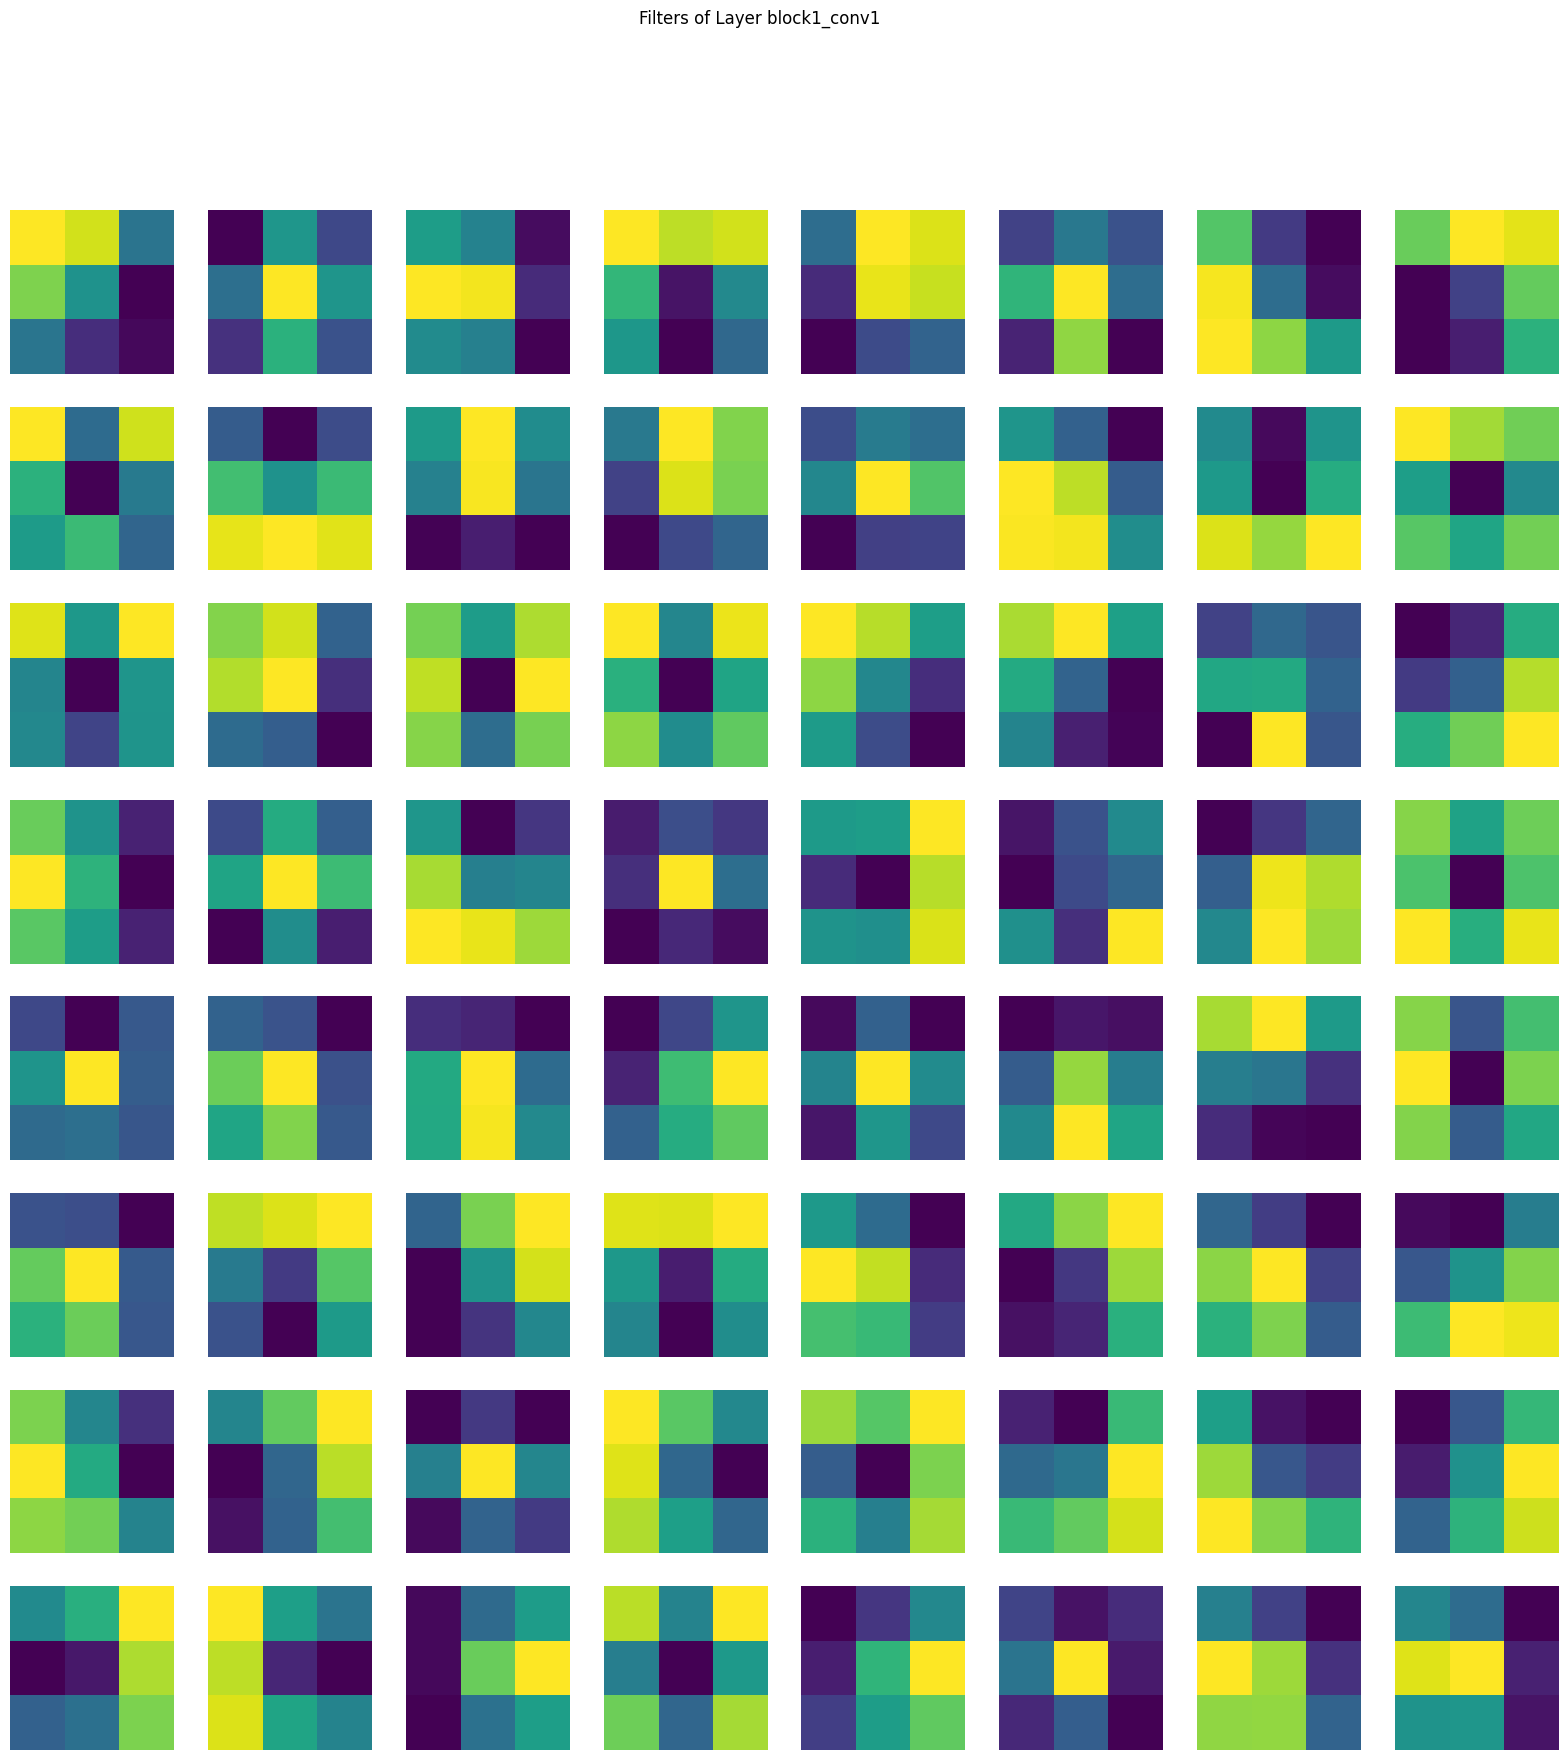

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [ ]:
img_path = "/content/ss.png"
layer_names = ["block1_conv1", "block2_conv1"] # Replace with layers of interest
visualize_intermediate_activations(model, img_path, layer_names)
visualize_filters(model, "block1_conv1")
visualize_heatmap(model, img_path, "block5_conv3")

In [ ]:
def visualize_heatmap(model, img_path, last_conv_layer_name, class_idx=None):
    img = load_and_preprocess_image(img_path)
    last_conv_layer = model.get_layer(last_conv_layer_name)
    heatmap_model = Model(inputs=model.input, outputs=[last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = heatmap_model(img)
        if class_idx is None:
            class_idx = tf.argmax(predictions[0]) # Default to the predicted class
        class_channel = predictions[:, class_idx]

        # Calculate gradients and other operations within the 'with' block
        grads = tape.gradient(class_channel, conv_outputs)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        conv_outputs = conv_outputs[0]

        # Use tf.math.multiply to perform element-wise multiplication
        # and create a new tensor instead of modifying in-place
        for i in range(conv_outputs.shape[-1]):
            conv_outputs = tf.tensor_scatter_nd_update(
                conv_outputs, [[slice(None), slice(None), i]],
                tf.math.multiply(conv_outputs[:, :, i], pooled_grads[i])
            )

    # Generate heatmap
    heatmap = np.mean(conv_outputs.numpy(), axis=-1) # Convert to NumPy array
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) # Normalize to [0, 1]

    original_img = cv2.imread(img_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    original_img = cv2.resize(original_img, (224, 224))

    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    plt.figure(figsize=(10, 10))
    plt.imshow(superimposed_img)
    plt.axis("off")
    plt.title("Class Activation Heatmap")
    plt.show()

**  EXPERIMENT 5**

In [ ]:
!pip install keras-tuner
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
def generate_data(num_samples=1000):
 input1 = np.random.rand(num_samples, 10) # Input 1: Shape (10,)
 input2 = np.random.rand(num_samples, 5) # Input 2: Shape (5,)
 output1 = np.sum(input1, axis=1) + np.sum(input2, axis=1) # Output 1
 output2 = np.mean(input1, axis=1) - np.mean(input2, axis=1) # Output 2
 return [input1, input2], [output1, output2]
train_inputs, train_outputs = generate_data()

In [ ]:
def build_model(hp):
 # Input layers
 input1 = Input(shape=(10,), name="input1")
 input2 = Input(shape=(5,), name="input2")
 # Dense layers for each input
 x1 = layers.Dense(hp.Int('units_input1', min_value=16, max_value=64, step=16),
activation='relu')(input1)
 x2 = layers.Dense(hp.Int('units_input2', min_value=16, max_value=64, step=16),
activation='relu')(input2)
 # Concatenate the two inputs
 merged = layers.concatenate([x1, x2])
 merged = layers.Dense(hp.Int('units_merged', min_value=16, max_value=64, step=16),
activation='relu')(merged)
 # Output layers
 output1 = layers.Dense(1, name="output1")(merged)
 output2 = layers.Dense(1, name="output2")(merged)
 model = Model(inputs=[input1, input2], outputs=[output1, output2])
 model.compile(optimizer=Adam(hp.Choice('learning_rate', [0.001, 0.01, 0.1])),
 loss='mse')

 return model

In [ ]:
tuner = kt.Hyperband(
 build_model,
 objective='val_loss',
 max_epochs=20,
 factor=3,
 directory='my_dir',
 project_name='multi_input_multi_output'
)
# Split data
val_inputs, val_outputs = generate_data(200)
tuner.search(train_inputs, train_outputs, validation_data=(val_inputs, val_outputs),
epochs=10, batch_size=32)

Trial 30 Complete [00h 00m 10s]
val_loss: 5.5549036915181205e-05

Best val_loss So Far: 5.5549036915181205e-05
Total elapsed time: 00h 02m 58s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)
best_model.summary()
# Train the best mode

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input1 (InputLayer)       │ (None, 10)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input2 (InputLayer)       │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 16)             │            176 │ input1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 16)             │             96 │ input2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 32)             │              0 │ dense_3[0][0],         │
│ (Concatenate)             │                        │                │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 48)             │          1,584 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output1 (Dense)           │ (None, 1)              │             49 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output2 (Dense)           │ (None, 1)              │             49 │ dense_5[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,954 (7.63 KB)

 Trainable params: 1,954 (7.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
best_model.fit(train_inputs, train_outputs, validation_data=(val_inputs, val_outputs),
epochs=50, batch_size=32)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 25.1679 - output1_loss: 24.1132 - output2_loss: 1.0370 - val_loss: 2.1401 - val_output1_loss: 2.2224 - val_output2_loss: 0.0363
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9671 - output1_loss: 0.9098 - output2_loss: 0.0568 - val_loss: 0.3186 - val_output1_loss: 0.3231 - val_output2_loss: 0.0121
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2748 - output1_loss: 0.2608 - output2_loss: 0.0138 - val_loss: 0.1813 - val_output1_loss: 0.1845 - val_output2_loss: 0.0083
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1532 - output1_loss: 0.1429 - output2_loss: 0.0102 - val_loss: 0.1362 - val_output1_loss: 0.1248 - val_output2_loss: 0.0096
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0815 - output1_loss: 0.0762 - output2_loss: 0.0053 - val_loss: 0.0325 - val_output1_loss: 0.0315 - val_output2_loss: 0.0029
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0256 - output1_lo

Experiment *6*

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical

In [ ]:
def sample(preds, temperature=1.0):
    """Helper function to sample an index from a probability array."""
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
maxlen = 40
step = 3
sentences = []
next_chars = []

# Define the 'text' variable before using it in the loop.
# Replace 'your_text_here' with your actual text data.
text = "Artificial Intelligence is rapidly evolving."  # Added longer text

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

# Define 'chars' and 'char_indices'
chars = sorted(list(set(text)))  # Get unique characters from the text
char_indices = dict((c, i) for i, c in enumerate(chars))

# Use 'bool' instead of 'np.bool' for dtype
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
 for t, char in enumerate(sentence):
  X[i, t, char_indices[char]] = 1
 y[i, char_indices[next_chars[i]]] = 1

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop')
# Training
model.fit(X, y, batch_size=128, epochs=40)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.0109
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.8915
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2.7696
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2.5371
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.7397
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.8614
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.7545
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.7234
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.7934
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.8039
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.7104
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - loss: 0.6797
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.6671
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.6576
Epoch 15/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.6486
Epoch 16/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [ ]:
start_index = np.random.randint(0, len(text) - maxlen - 1)
generated_text = text[start_index: start_index + maxlen]
diversity = 0.5  # Adjust the diversity value as needed

for i in range(400):
    x_pred = np.zeros((1, maxlen, len(chars)))
    for t, char in enumerate(generated_text[-maxlen:]):  # Only use the last maxlen characters
        x_pred[0, t, char_indices[char]] = 1.
    preds = model.predict(x_pred, verbose=0)
    next_index = sample(preds[0], diversity)  # Call the defined 'sample' function
    next_char = chars[next_index]  # Use 'chars' instead of 'indices_char'
    generated_text += next_char